# Predict who wrote the Supreme Court opinions that don't have authors.

These are called [per curiam](https://en.wikipedia.org/wiki/Per_curiam_decision) decisions. Using the language in opinions that *do* have authors, we can probably predict who wrote them.

You should **probably use the Classification Template we used in class**, it isn't like this has anything useful in it. You might also want to take a look at the template from class, especially the part about **custom features** - I hear sentence length is an important one!

Also, the `ny-doctors` assignment is a little more of a walkthrough on the same topic. Might be helpful!

In [134]:
import pandas as pd
import numpy as np
df = pd.read_csv("supreme-court-opinions.csv")

#last row seems corrupted
df = df.drop(df.index[-1])
df.shape

(970, 3)

In [135]:
df['sentence_length'] = df['content'].apply(lambda x: sum(len(i) for i in x.split("."))/len(x.split(".")))
df['word_length'] = df['content'].apply(lambda x: sum(len(i) for i in x.split(" "))/len(x.split(" ")))

In [136]:
no_author = df[df.author.isnull()]
with_author = df[df.author.notnull()]

In [206]:
stop_words = ['justice','alito', 'breyer', 'ginsburg', 'gorsuch', 'kagan', 'kennedy','roberts', 'scalia', 'sotomayor', 'thomas']

In [346]:
### from sklearn.feature_extraction.text import TfidfVectorizer

#not English stop words, to compare style
vec = TfidfVectorizer(stop_words=stop_words, min_df=40, max_df = 120, ngram_range=(4,4))

matrix = vec.fit_transform(with_author['content'].str.replace("\d",""))
features_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
features_df.shape

(899, 185)

In [347]:
features_df = features_df.join(with_author['word_length'].reset_index(drop=True))
features_df = features_df.join(with_author['sentence_length'].reset_index(drop=True))

In [348]:
features_df

,___ ___ ___ slip,___ dissenting slip op,according to the court,affirmed delivered the opinion,agree with the court,al as amici curiae,an opinion concurring in,and concurring in judgment,and concurring in the,and dissenting in part,...,whom and join dissenting,with respect to the,with the court that,with whom and join,with whom joins concurring,with whom joins dissenting,within the meaning of,within the scope of,word_length,sentence_length
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.195541,0.000000,0.00000,0.173733,0.000000,0.000000,0.000000,0.000000,5.344108,81.473404
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5.574428,71.251282
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.235637,0.000000,0.000000,5.652813,91.840000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5.606236,57.979381
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.576415,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.121261,0.000000,0.000000,0.000000,0.000000,5.643256,54.807512
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.200476,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5.490560,62.409222
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5.532075,68.240000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5.484848,41.800000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5.339007,69.936508
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,5.621928,70.489796


In [349]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
with_author['label'] = le.fit_transform(with_author.author)
le.inverse_transform([0,1,2,3,4,5,6,7,8,9])


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array(['ALITO', 'BREYER', 'GINSBURG', 'GORSUCH', 'KAGAN', 'KENNEDY',
       'ROBERTS', 'SCALIA', 'SOTOMAYOR', 'THOMAS'], dtype=object)

In [350]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [351]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
features_df.values,
with_author.reset_index(drop=True).label,
test_size=0.2) 

In [352]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [353]:
clf.score(X_test, y_test)

0.28888888888888886

In [354]:
clf.score(X_train, y_train)

1.0

In [368]:
#prediction
vec_predict = TfidfVectorizer(stop_words=stop_words, ngram_range=(4,4), vocabulary=vec.get_feature_names())

matrix_predict = vec_predict.fit_transform(no_author['content'].str.replace("\d",""))
features_df_predict = pd.DataFrame(matrix_predict.toarray(), columns=vec_predict.get_feature_names())
features_df_predict = features_df_predict.join(no_author['word_length'].reset_index(drop=True))
features_df_predict = features_df_predict.join(no_author['sentence_length'].reset_index(drop=True))

prediction = le.inverse_transform(clf.predict(features_df_predict))

pd.concat([no_author.reset_index(),pd.DataFrame(prediction)],axis=1)

,index,content,case,author,sentence_length,word_length,0
0,20,"JAVIER CAVAZOS, ACTING WARDEN v. SHIRLEY The o...",10-1115,NaN,65.833333,5.383995,ROBERTS
1,43,KPMG LLP v. ROBERT COCCHI ET AL.\nAgreements t...,10-1521,NaN,59.832000,5.347245,BREYER
2,44,"DAVID BOBBY, WARDEN v. ARCHIE DIXON Under the ...",10-1540,NaN,74.330097,5.404457,KENNEDY
3,79,Slip Opinion NOTICE: This opinion is subject t...,10-7081b2d,NaN,50.100000,5.387500,THOMAS
4,122,v. LORENZO JOHNSON Respondent Lorenzo Johnson ...,11-1053,NaN,65.265957,5.167327,THOMAS
5,133,"ET AL. v. STEVE BULLOCK, ATTORNEY A Montana st...",11-1179h9j3,NaN,48.937500,5.686192,GINSBURG
6,134,"OF STATE, ET AL. v. JEFFERSON COUNTY Plaintiff...",11-1184_ap6c,NaN,63.074074,5.679537,GINSBURG
7,148,"NITRO-LIFT TECHNOLOGIES, L. L. C. v. EDDIE LEE...",11-1377_3e04,NaN,49.614130,5.405089,THOMAS
8,154,NOTICE: This opinion is subject to formal revi...,11-1425_cb8e,NaN,59.640845,5.406994,THOMAS
9,173,Slip Opinion NOTICE: This opinion is subject t...,11-199,NaN,57.888889,5.543210,GINSBURG


In [226]:
%matplotlib inline

import pydotplus
import sklearn.tree as tree
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None,                           
    feature_names=vec.get_feature_names(),  
    class_names=clf.classes_.astype(str),  
    filled=True, rounded=True,  proportion=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

IndexError: list index out of range

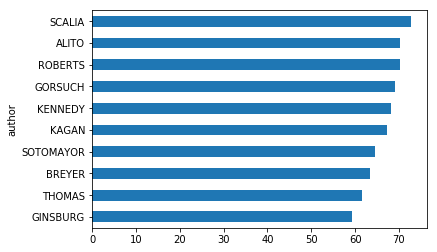

In [372]:
with_author.groupby('author').sentence_length.mean().sort_values().plot(kind='barh')

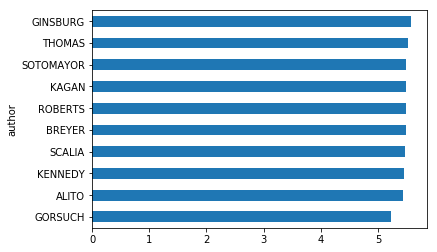

In [373]:
with_author.groupby('author').word_length.mean().sort_values().plot(kind='barh')

In [375]:
features_df_test = pd.concat([with_author['sentence_length'].reset_index(drop=True),with_author['word_length'].reset_index(drop=True)],axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
features_df_test.values,
with_author.reset_index(drop=True).label,
test_size=0.2) 

In [376]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [377]:
clf.score(X_test, y_test)

0.14999999999999999

In [378]:
clf.score(X_train, y_train)

1.0

In [380]:
%matplotlib inline

import pydotplus
import sklearn.tree as tree
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None,                           
    feature_names=features_df_test.columns,  
    class_names=clf.classes_.astype(str),  
    filled=True, rounded=True,  proportion=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
